In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

In [2]:
iris_obj = load_iris()
iris_data = iris_obj.data
species = iris_obj.target
iris_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

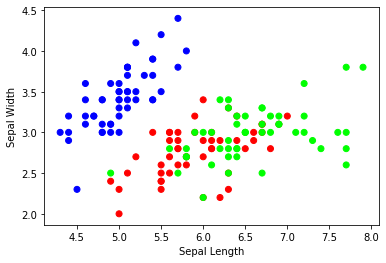

In [3]:
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=species, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
irisclust = KMeans(n_clusters=3, init='random')    # Three clusters with cluster centers chosen as random dataset points
irisclust.fit(iris_data)
irisclust.cluster_centers_    # The coordinates of cluster centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

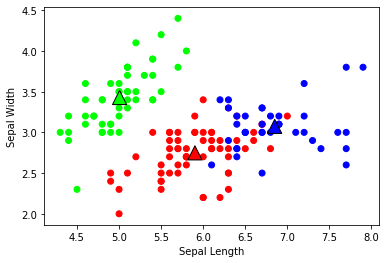

In [6]:
# Visualizing the clustering
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=irisclust.predict(iris_data), cmap=plt.cm.brg)
plt.scatter(irisclust.cluster_centers_[:, 0], irisclust.cluster_centers_[:, 1],
            c=irisclust.predict(irisclust.cluster_centers_), cmap=plt.cm.brg, marker='^', s=200,
            edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [7]:
def wcsse_plot(data, max_clusters):
    """Plots sum of within-cluster sum of squared errors for clusters up to max_clusters for dataset data"""
    wcsse = np.arange(max_clusters) + 1
    for k in wcsse:
        wcsse[k - 1] = KMeans(n_clusters=k).fit(data).inertia_    # inertia is the sum described above
    plt.plot(np.arange(max_clusters) + 1, wcsse, marker='o')

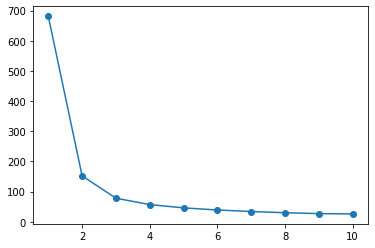

In [8]:
wcsse_plot(iris_data, 10)

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
def silhouette_plot(data, labels, metric="euclidean", xticks = True):
    """Creates a silhouette plot given a dataset and the labels corresponding to cluster assignment, and reports the
       average silhouette score"""
    silhouette_avg = silhouette_score(data, labels,
                                      metric=metric)    # The average silhouette score over the entire sample
    sample_silhouette_values = silhouette_samples(data, labels,
                                                  metric=metric)    # The silhouette score of each individual data point
    
    # This loop creates the silhouettes in the silhouette plot
    y_lower = 10    # For space between silhouettes
    for k in np.unique(labels):
        cluster_values = sample_silhouette_values[labels == k]
        cluster_values.sort()
        nk = len(cluster_values)
        y_upper = y_lower + nk
        color = cm.spectral(float(k) / len(np.unique(labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_values,
                          facecolor=color, edgecolor=color)
        plt.text(-0.05, y_lower + 0.5 * nk, str(k))
        y_lower = y_upper + 10
    
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    if xticks:
        plt.xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.yticks([])
    plt.xlabel("Silhouette Score")
    plt.ylabel("Cluster")
    plt.show()
    
    print("The average silhouette score is", silhouette_avg)

In [ ]:
silhouette_plot(iris_data, irisclust.predict(iris_data))